In [1]:
# Goal: write a function to determine whether graph is connected, using 
# Depth First Search

In [2]:
import numpy as np # will use numpy arrays to represent adjacency matrices
import networkx as nx # use to draw graphs

In [15]:
visited = [] # will track of which vertices have been visited
# visited[i] will be True iff vertex i has been visited. 
# Global variable that will be changed by is_connected and explore

def is_connected(A):
    """Returns true iff the graph given by adjacency matrix A is connected.
    Uses depth first search."""
    global visited # tells this function that visited is a global variable, so visited
    # will be the same for all function calls 
    num_vert = len(A) # number of vertices in graph
    visited = [False for i in range(num_vert)] # at start, all vertices are labelled unvisited
    # this changes the global copy, since visited was declared global 
    
    explore(A,0) # explore starting at vertex 0
    # graph is connected iff the connected component 0 is the whole graph
    # i.e. if the whole graph is visited after calling explore(A)
    if False in visited: # some vertex was not visited 
        return False 
    else: 
        return True 

# helper function for the above   
def explore(A,v):
    """Explore vertices that are accessible from v and haven't yet been visited. """
    global visited 
    num_vert = len(A)
    print(v) # for testing
    visited[v] = True # label v as visited
    
    # go through neighbors, and explore the unvisited ones
    for i in range(num_vert): # loop through all vertices 
        if A[v,i]==1 and visited[i]==False:
            explore(A,i)
    

0
1
2


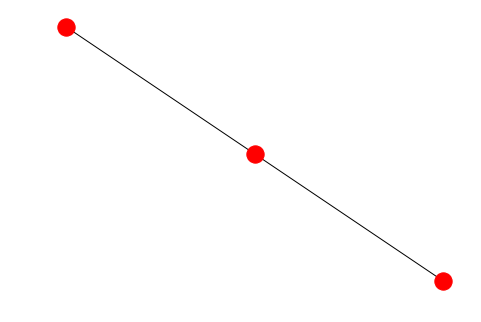

In [18]:
# test out explore 
A1 = np.array([[0,1,0],[1,0,1],[0,1,0]])
nx.draw(nx.Graph(A1))
visited = [False for i in range(len(A1))]
explore(A1,0)

0
1
2
3


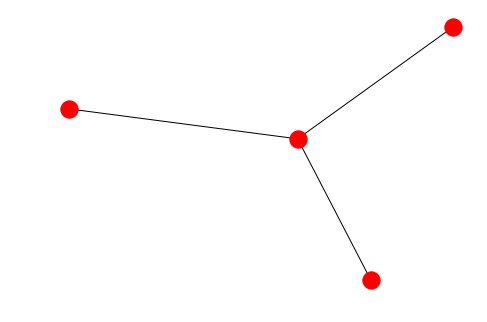

In [19]:
# test out explore 
A2 = np.array([[0,1,0,0],[1,0,1,1],[0,1,0,0],[0,1,0,0]])
nx.draw(nx.Graph(A2))
visited = [False for i in range(len(A2))]
explore(A2,0)

In [21]:
# test out is_connected on graph A2 from above
is_connected(A2)

0
1
2
3


True

In [23]:
# random graph code from last time

# Fixed edges model: control the number of vertices and number of edges 
import numpy as np 

def rand_graph(num_v, num_e):
    """Returns a random graph with num_v vertices and num_e edges. 
    Represented as an numpy array giving the adjacency matrix.
    Pick two distinct vertices randomly, add an edge between if there isn't one already.
    Repeat this process until we have num_e edges."""
    A = np.zeros((num_v,num_v)) # adjacency matrix, start off all zeros
    e_so_far = 0 # number of edges added so far
    while e_so_far < num_e:
        # Choose two vertices randomly
        i = randint(0,num_v-1)
        j = randint(0,num_v-1)
        if i!=j and A[i,j]==0:  # tests whether i,j are different, and no edge yet
            A[i,j]=1  # add edge
            A[j,i]=1
            e_so_far += 1
    # note: above loop would be infinite if num_e is greater than number of pairs of
    # distinct vertices
    return A

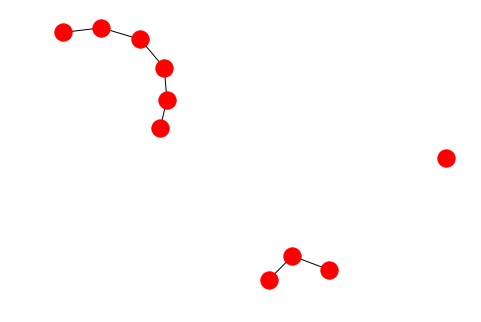

In [27]:
# test out is_connected on random graph 
A3 = rand_graph(10,7)
nx.draw(nx.Graph(A3))

In [28]:
is_connected(A3)

0
6
3
2
7
5


False

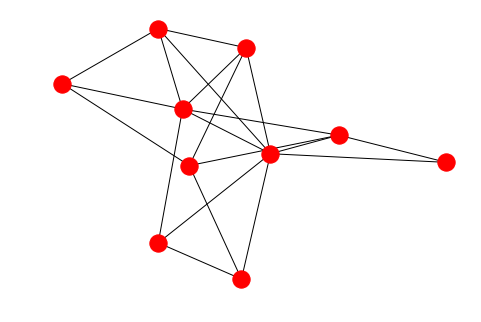

In [33]:
A4 = rand_graph(10,20)
nx.draw(nx.Graph(A4))

In [34]:
is_connected(A4)

0
1
3
2
8
4
5
7
6
9


True

0
1
3
4
2
5
6


True

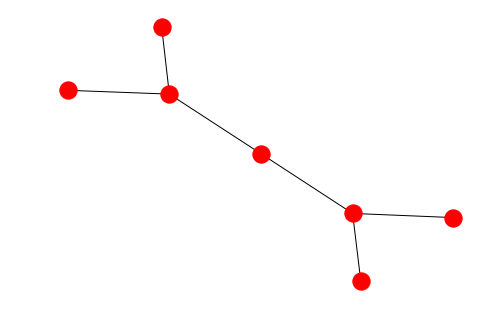

In [42]:
# graph that is a tree with 3 levels
# structure of graph A5; each vertex shares an edge with vertex above
#       0
#    1    2
#   3 4  5 6
A5 = np.array([[0,1,1,0,0,0,0], [1,0,0,1,1,0,0], [1,0,0,0,0,1,1],[0,1,0,0,0,0,0], \
               [0,1,0,0,0,0,0], [0,0,1,0,0,0,0],[0,0,1,0,0,0,0]])
nx.draw(nx.Graph(A5))
is_connected(A5)
# shows that the exploration is depth first 